In [41]:
# source: https://www.tidytextmining.com/tfidf.html
# https://github.com/juliasilge/janeaustenr/blob/master
library(dplyr)
library(tidytext)
library(forcats)
library(ggplot2)
library(readtext)
library(readr)

In [ ]:
tidy <- function(books){
    ret <- data.frame(text = unlist(books, use.names = FALSE), 
                     stringsAsFactors = FALSE)
    ret$book <- factor(rep(names(books), sapply(books, length)))
    ret$book <- factor(ret$book, levels = unique(ret$book))
    structure(ret, class = c("tbl_df", "tbl", "data.frame"))
}

In [93]:
directory = "C:\\Users\\amycw\\Desktop\\ecbc research\\eic_monopoly_eebo"
# names <- list.files(directory, pattern=".txt", recursive=TRUE, full.names=FALSE)
books <- list(
#         "A25_P5_112.txt" = readLines(paste(directory,"A25_P5_112.txt",sep="\\")),
#         "A25_P5_154.txt" = readLines(paste(directory,"A25_P5_154.txt",sep="\\")),
#         "A25_P5_179.txt" = readLines(paste(directory,"A25_P5_179.txt",sep="\\")),
#         "A26_P5_163.txt" = readLines(paste(directory,"A26_P5_163.txt",sep="\\")),
#         "A29_P5_137.txt" = readLines(paste(directory,"A29_P5_137.txt",sep="\\")),
#         "A29_P5_198.txt" = readLines(paste(directory,"A29_P5_198.txt",sep="\\")),
#         "A2_P4_1058.txt" = readLines(paste(directory,"A2_P4_1058.txt",sep="\\")),
#         "A2_P4_1126.txt" = readLines(paste(directory,"A2_P4_1126.txt",sep="\\")),
#         "A2_P4_1179.txt" = readLines(paste(directory,"A2_P4_1179.txt",sep="\\")),
#         "A2_P4_1395.txt" = readLines(paste(directory,"A2_P4_1395.txt",sep="\\"))
        
#         "A2_P4_1978.txt" = readLines(paste(directory,"A2_P4_1978.txt",sep="\\")),
#         "A2_P4_2040.txt" = readLines(paste(directory,"A2_P4_2040.txt",sep="\\")),
#         "A33_P5_101.txt" = readLines(paste(directory,"A33_P5_101.txt",sep="\\")),
#         "A33_P5_118.txt" = readLines(paste(directory,"A33_P5_118.txt",sep="\\")),
#         "A34_P5_82.txt" = readLines(paste(directory,"A34_P5_82.txt",sep="\\")),
#         "A38_P5_183.txt" = readLines(paste(directory,"A38_P5_183.txt",sep="\\")),
#         "A3_P4_1012.txt" = readLines(paste(directory,"A3_P4_1012.txt",sep="\\")),
#         "A3_P4_1223.txt" = readLines(paste(directory,"A3_P4_1223.txt",sep="\\")),
#         "A3_P4_1230.txt" = readLines(paste(directory,"A3_P4_1230.txt",sep="\\")),
#         "A3_P4_1806.txt" = readLines(paste(directory,"A3_P4_1806.txt",sep="\\"))
    
#         "A3_P4_2047.txt" = readLines(paste(directory,"A3_P4_2047.txt",sep="\\")),
#         "A3_P4_2202.txt" = readLines(paste(directory,"A3_P4_2202.txt",sep="\\")),
#         "A3_P4_781.txt" = readLines(paste(directory,"A3_P4_781.txt",sep="\\")),
#         "A3_P4_801.txt" = readLines(paste(directory,"A3_P4_801.txt",sep="\\")),
#         "A46_P5_228.txt" = readLines(paste(directory,"A46_P5_228.txt",sep="\\")),
#         "A46_P5_58.txt" = readLines(paste(directory,"A46_P5_58.txt",sep="\\")),
#         "A4_P4_1069.txt" = readLines(paste(directory,"A4_P4_1069.txt",sep="\\")),
#         "A4_P4_155.txt" = readLines(paste(directory,"A4_P4_155.txt",sep="\\")),
#         "A4_P4_1747.txt" = readLines(paste(directory,"A4_P4_1747.txt",sep="\\")),
#         "A4_P4_1972.txt" = readLines(paste(directory,"A4_P4_1972.txt",sep="\\"))
    
#         "A4_P4_2248.txt" = readLines(paste(directory,"A4_P4_2248.txt",sep="\\")),
#         "A4_P4_2918.txt" = readLines(paste(directory,"A4_P4_2918.txt",sep="\\")),
#         "A55_P5_51.txt" = readLines(paste(directory,"A55_P5_51.txt",sep="\\")),
#         "A55_P5_53.txt" = readLines(paste(directory,"A55_P5_53.txt",sep="\\")),
#         "A5_P4_1219.txt" = readLines(paste(directory,"A5_P4_1219.txt",sep="\\")),
#         "A5_P4_1695.txt" = readLines(paste(directory,"A5_P4_1695.txt",sep="\\")),
#         "A5_P4_1696.txt" = readLines(paste(directory,"A5_P4_1696.txt",sep="\\")),
#         "A5_P4_1697.txt" = readLines(paste(directory,"A5_P4_1697.txt",sep="\\")),
#         "A5_P4_1965.txt" = readLines(paste(directory,"A5_P4_1965.txt",sep="\\")),
#         "A5_P4_1976.txt" = readLines(paste(directory,"A5_P4_1976.txt",sep="\\"))
    
#         "A5_P4_2676.txt" = readLines(paste(directory,"A5_P4_2676.txt",sep="\\")),
#         "A5_P4_3070.txt" = readLines(paste(directory,"A5_P4_3070.txt",sep="\\")),
#         "A5_P4_814.txt" = readLines(paste(directory,"A5_P4_814.txt",sep="\\")),
#         "A5_P4_939.txt" = readLines(paste(directory,"A5_P4_939.txt",sep="\\")),
#         "A6_P4_1275.txt" = readLines(paste(directory,"A6_P4_1275.txt",sep="\\")),
#         "A6_P4_1381.txt" = readLines(paste(directory,"A6_P4_1381.txt",sep="\\")),
#         "A6_P4_231.txt" = readLines(paste(directory,"A6_P4_231.txt",sep="\\")),
#         "A6_P4_2311.txt" = readLines(paste(directory,"A6_P4_2311.txt",sep="\\")),
#         "A6_P4_306.txt" = readLines(paste(directory,"A6_P4_306.txt",sep="\\")),
#         "A7_P4_2397.txt" = readLines(paste(directory,"A7_P4_2397.txt",sep="\\"))
    
        "A8_P4_1129.txt" = readLines(paste(directory,"A8_P4_1129.txt",sep="\\")),
        "A8_P4_3383.txt" = readLines(paste(directory,"A8_P4_3383.txt",sep="\\")),
        "A8_P4_666.txt" = readLines(paste(directory,"A8_P4_666.txt",sep="\\")),
        "A8_P4_669.txt" = readLines(paste(directory,"A8_P4_669.txt",sep="\\")),
        "A92_P5_83.txt" = readLines(paste(directory,"A92_P5_83.txt",sep="\\")),
        "A9_P4_1092.txt" = readLines(paste(directory,"A9_P4_1092.txt",sep="\\")),
        "A9_P4_1097.txt" = readLines(paste(directory,"A9_P4_1097.txt",sep="\\")),
        "A9_P4_1105.txt" = readLines(paste(directory,"A9_P4_1105.txt",sep="\\")),
        "A9_P4_1115.txt" = readLines(paste(directory,"A9_P4_1115.txt",sep="\\")),
        "B02_P5_84.txt" = readLines(paste(directory,"B02_P5_84.txt",sep="\\")),
        "B0_P4_557.txt" = readLines(paste(directory,"B0_P4_557.txt",sep="\\"))
    )

Joining, by = "word"


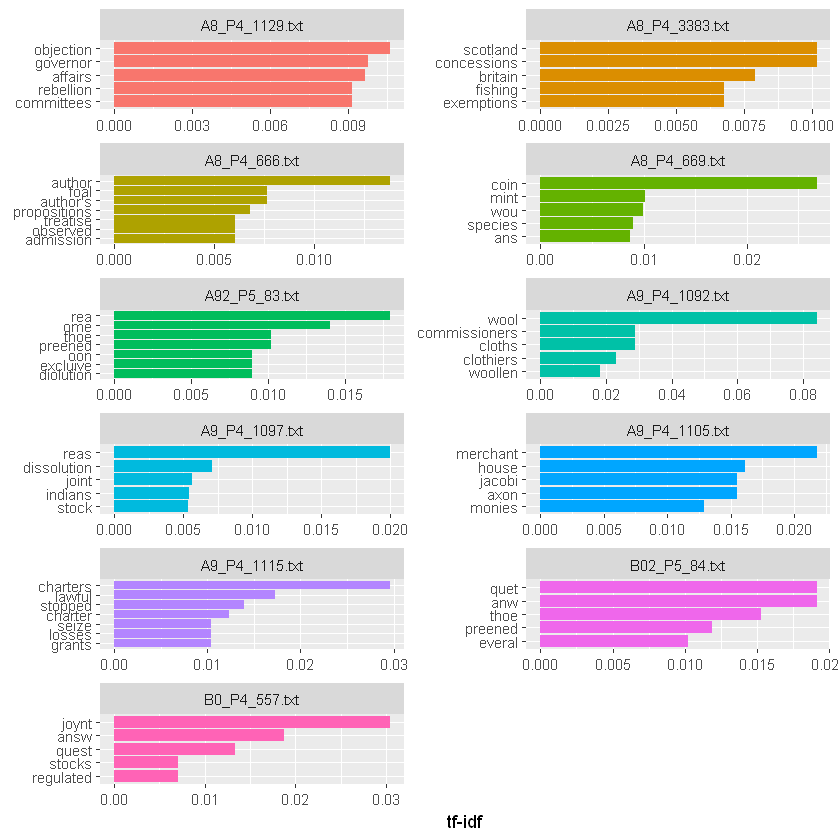

In [94]:
book_words <- tidy(books) %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

book_words <- book_words %>%
  count(book, word, sort = TRUE) 

book_tf_idf <- book_words %>%
  bind_tf_idf(word, book, n)

book_tf_idf %>%
  group_by(book) %>%
  slice_max(tf_idf, n = 5) %>%
  ungroup() %>%
  ggplot(aes(tf_idf, fct_reorder(word, tf_idf), fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free") +
  labs(x = "tf-idf", y = NULL)